In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [144]:
from sklearn.preprocessing import LabelEncoder

In [145]:
email_spam = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv",encoding=('ISO-8859-1'), low_memory=False)

In [146]:
email_spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [147]:
email_spam.head(150)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
145,ham,Whats the staff name who is taking class for us?,NaN,NaN,NaN
146,spam,FreeMsg Why haven't you replied to my text? I'...,NaN,NaN,NaN
147,ham,Ummma.will call after check in.our life will b...,NaN,NaN,NaN
148,ham,K..i deleted my contact that why?,NaN,NaN,NaN


In [148]:
email_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [149]:
email_spam.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [150]:
email_spam.isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [151]:
email_spam.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [152]:
email_spam.shape

(5572, 5)

In [153]:
email_spam.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   v1          5572 non-null   bool 
 1   v2          5572 non-null   bool 
 2   Unnamed: 2  5572 non-null   bool 
 3   Unnamed: 3  5572 non-null   bool 
 4   Unnamed: 4  5572 non-null   bool 
dtypes: bool(5)
memory usage: 27.3 KB


In [154]:
email_spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [155]:
email_spam.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)


In [156]:
email_spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [157]:
email_spam.columns=['target','text']

In [158]:
email_spam.head(150)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
145,ham,Whats the staff name who is taking class for us?
146,spam,FreeMsg Why haven't you replied to my text? I'...
147,ham,Ummma.will call after check in.our life will b...
148,ham,K..i deleted my contact that why?


In [159]:
encoder = LabelEncoder()

In [160]:
encoder.fit_transform(email_spam['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [161]:
email_spam['target'] = encoder.fit_transform(email_spam['target'])

In [162]:
email_spam.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### exploratory data analysis

<Axes: xlabel='target', ylabel='Count'>

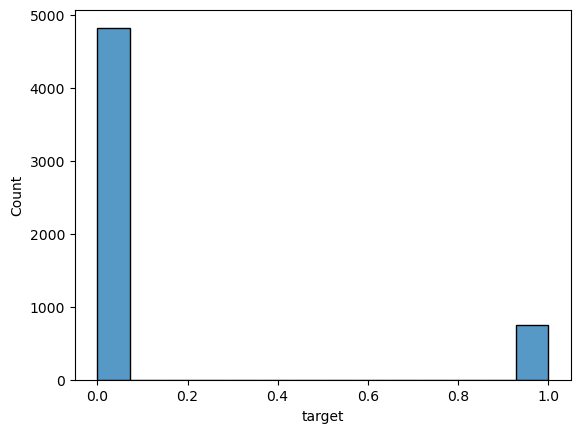

In [163]:
sns.histplot(x='target', data=email_spam)

<Axes: xlabel='target', ylabel='count'>

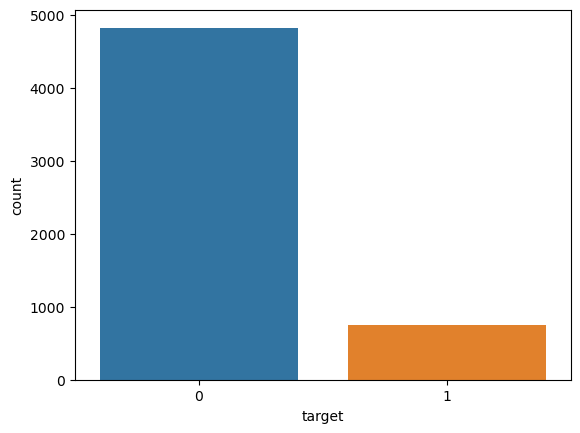

In [164]:
sns.countplot(x='target', data=email_spam)

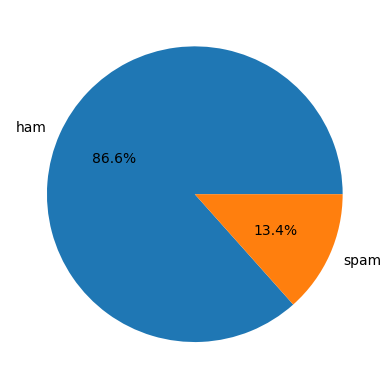

In [165]:
plt.pie(email_spam["target"].value_counts(),labels=['ham','spam'], autopct='%1.1f%%')
plt.show()

### no of characters, words and sentences

In [166]:
email_spam['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [167]:
email_spam['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5572, dtype: int64

In [168]:
email_spam['num_characters'] = email_spam['text'].apply(len)

In [169]:
email_spam.head(100)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
95,1,Your free ringtone is waiting to be collected....,125
96,0,Watching telugu movie..wat abt u?,33
97,0,i see. When we finish we have loads of loans t...,51
98,0,Hi. Wk been ok - on hols now! Yes on for a bit...,184


In [170]:
import nltk

In [171]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [172]:
email_spam['num_words'] = email_spam['text'].apply(lambda x:len(nltk.word_tokenize(x)))




In [173]:
email_spam['num_sentences'] = email_spam['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [174]:
email_spam.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,23
1,0,Ok lar... Joking wif u oni...,29,8,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37
3,0,U dun say so early hor... U c already then say...,49,13,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15


In [175]:
email_spam[email_spam['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.076062,17.076062
std,58.016023,13.875446,13.875446
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,8.000000
50%,52.000000,13.000000,13.000000
75%,92.000000,22.000000,22.000000
max,910.000000,219.000000,219.000000


In [176]:
email_spam[email_spam['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.076062,17.076062
std,58.016023,13.875446,13.875446
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,8.000000
50%,52.000000,13.000000,13.000000
75%,92.000000,22.000000,22.000000
max,910.000000,219.000000,219.000000


### data visualisation

<Axes: xlabel='num_characters', ylabel='Count'>

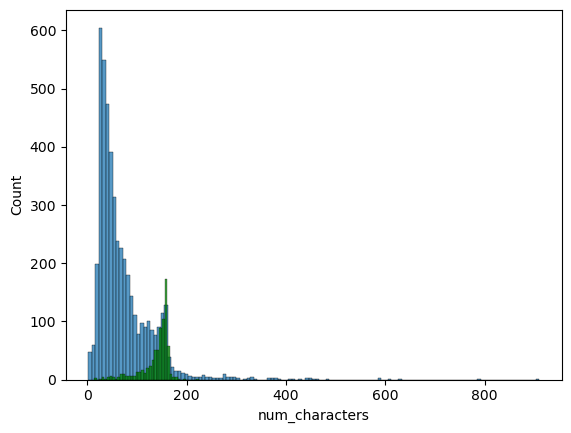

In [177]:
sns.histplot(email_spam[email_spam['target']==0]['num_characters'])
sns.histplot(email_spam[email_spam['target']==1]['num_characters'], color='green')

<Axes: xlabel='num_words', ylabel='Count'>

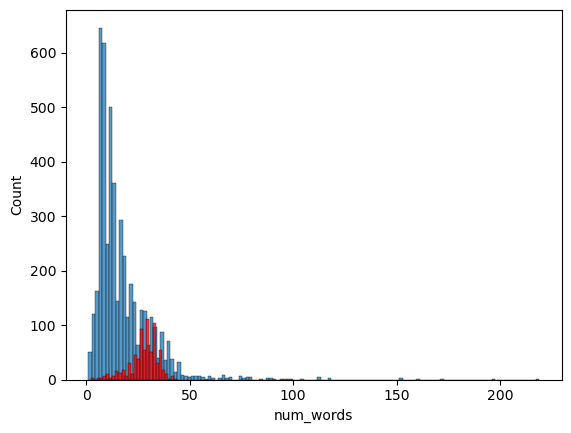

In [178]:
sns.histplot(email_spam[email_spam['target']==0]['num_words'])
sns.histplot(email_spam[email_spam['target']==1]['num_words'], color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

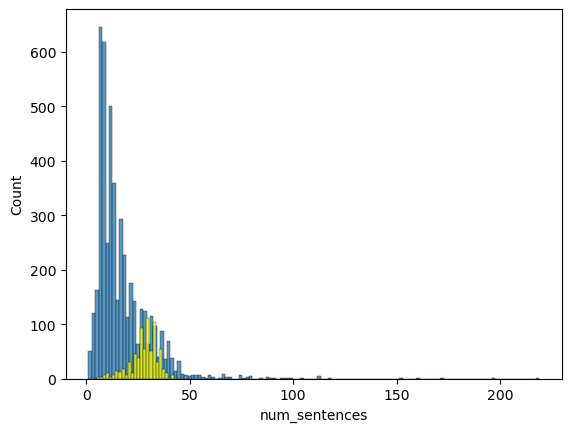

In [179]:
sns.histplot(email_spam[email_spam['target']==0]['num_sentences'])
sns.histplot(email_spam[email_spam['target']==1]['num_sentences'], color='yellow')

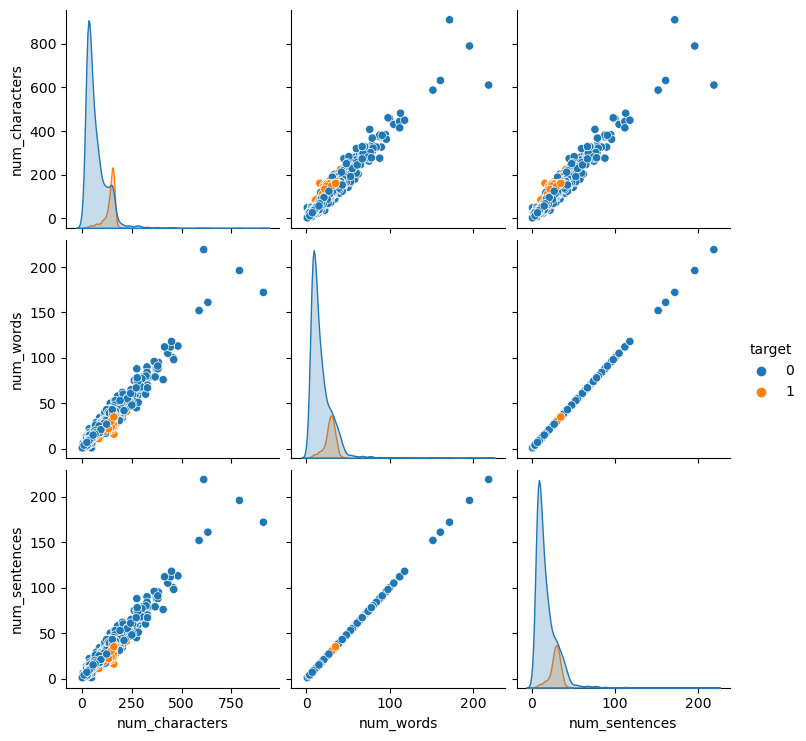

In [180]:
sns.pairplot(email_spam, hue='target')

/tmp/ipykernel_32/3034608827.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(email_spam.corr(), annot=True)


<Axes: >

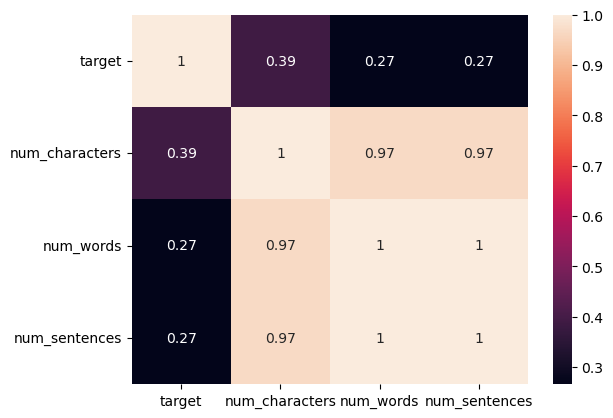

In [181]:
sns.heatmap(email_spam.corr(), annot=True)

<Axes: xlabel='num_characters', ylabel='num_words'>

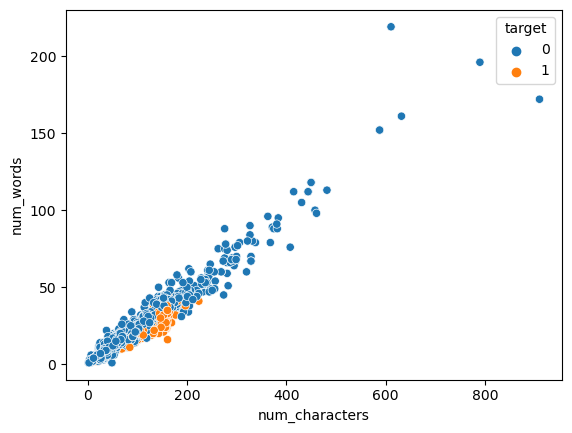

In [182]:
sns.scatterplot(x='num_characters',y='num_words',data=email_spam, hue='target')


## text preprocessing



In [183]:
from nltk.corpus import stopwords

In [184]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [185]:
import string


In [186]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [187]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [188]:
def transform_text(text):
    text = text.lower()
    text=nltk.word_tokenize(text)
    filtered_words = []
    for word in text:
        if word.isalnum():
            filtered_words.append(word)
    text = filtered_words[:]
    filtered_words.clear()
    for words in text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            filtered_words.append(word)
    text = filtered_words[:]
    filtered_words.clear()
    stemmer = PorterStemmer()
    for word in text:
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)
    transformed_text = " ".join(filtered_words)
    return transformed_text

In [189]:
email_spam['transformed_text'] = email_spam['text'].apply(transform_text)

In [190]:
from wordcloud import WordCloud

#### generating the word cloud for spam words

In [191]:
wordcloud=WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [192]:
wordcloud_spam = wordcloud.generate(email_spam[email_spam['target']==1]['transformed_text'].str.cat(sep=" "))


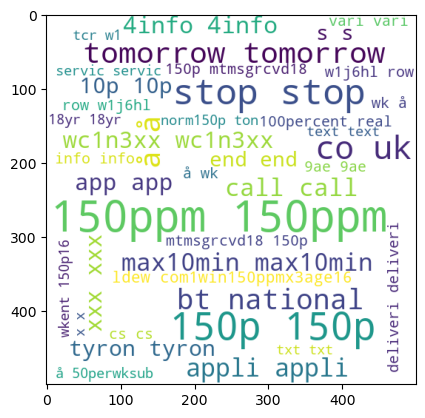

In [193]:
plt.imshow(wordcloud_spam)

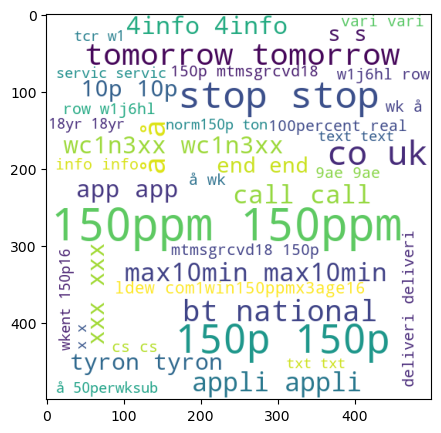

In [194]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_spam)
plt.show()

#### generating word cloud for ham words

In [195]:
wordcloud_ham = wordcloud.generate(email_spam[email_spam['target']==0]['transformed_text'].str.cat(sep=" "))


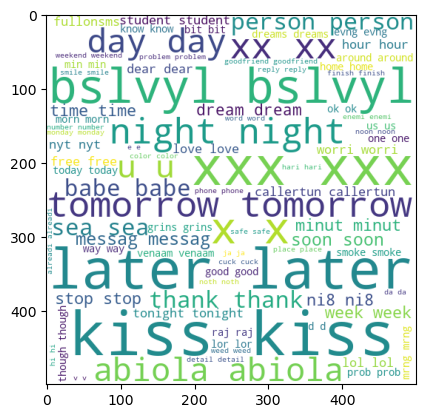

In [196]:
plt.imshow(wordcloud_ham)

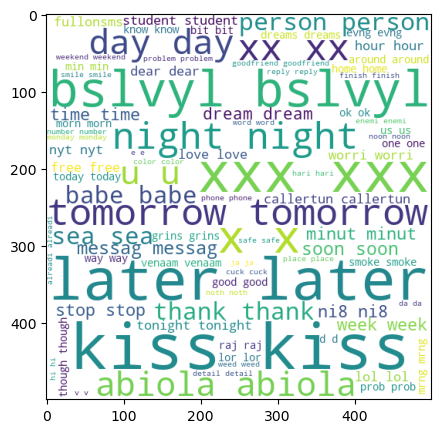

In [197]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_ham)
plt.show()

#### top 30 word which are popularly used in spam messages

In [198]:
email_spam[email_spam['target']==1]

,target,text,num_characters,num_words,num_sentences,transformed_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,'s 's 's 's 's 's 's 's 's 's 's 's 's 's 's '...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,39,rcv rcv rcv rcv rcv rcv rcv rcv rcv rcv rcv rc...
8,1,WINNER!! As a valued network customer you have...,158,32,32,
9,1,Had your mobile 11 months or more? U R entitle...,154,31,31,08002986030 08002986030 08002986030 0800298603...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,31,info info info info info info info info info i...
...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,18,3xx 3xx 3xx 3xx 3xx 3xx 3xx 3xx 3xx 3xx 3xx 3x...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,38,å£800 å£800 å£800 å£800 å£800 å£800 å£800 å£80...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,35,
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,30,postcod postcod postcod postcod postcod postco...


In [199]:
email_spam[email_spam['target']==1]['transformed_text'].to_list()

["'s 's 's 's 's 's 's 's 's 's 's 's 's 's 's 's 's 's 's 's 's 's 's 's 's 's 's 's 's 's",
 'rcv rcv rcv rcv rcv rcv rcv rcv rcv rcv rcv rcv rcv rcv rcv rcv rcv rcv rcv rcv rcv rcv rcv rcv rcv rcv rcv rcv rcv rcv rcv',
 '',
 '08002986030 08002986030 08002986030 08002986030 08002986030 08002986030 08002986030 08002986030 08002986030 08002986030 08002986030 08002986030 08002986030 08002986030 08002986030 08002986030 08002986030 08002986030 08002986030 08002986030 08002986030 08002986030 08002986030 08002986030 08002986030 08002986030 08002986030 08002986030 08002986030',
 'info info info info info info info info info info info info info info info info info info info info info info',
 '4403ldnw1a7rw18 4403ldnw1a7rw18 4403ldnw1a7rw18 4403ldnw1a7rw18 4403ldnw1a7rw18 4403ldnw1a7rw18 4403ldnw1a7rw18 4403ldnw1a7rw18 4403ldnw1a7rw18 4403ldnw1a7rw18 4403ldnw1a7rw18 4403ldnw1a7rw18 4403ldnw1a7rw18 4403ldnw1a7rw18 4403ldnw1a7rw18 4403ldnw1a7rw18 4403ldnw1a7rw18 4403ldnw1a7rw18 4403ldnw1a7rw18 4

### as these doesn't appear as popular spam texts

#### top 25 words used in spam corpus

In [200]:
from collections import Counter
spam_freq = []
for msg in email_spam[email_spam['target'] == 1]['transformed_text'].to_list():
    for word in msg.split():
        spam_freq.append(word)

In [201]:
spam_freq

["'s",
 "'s",
 "'s",
 "'s",
 "'s",
 "'s",
 "'s",
 "'s",
 "'s",
 "'s",
 "'s",
 "'s",
 "'s",
 "'s",
 "'s",
 "'s",
 "'s",
 "'s",
 "'s",
 "'s",
 "'s",
 "'s",
 "'s",
 "'s",
 "'s",
 "'s",
 "'s",
 "'s",
 "'s",
 "'s",
 'rcv',
 'rcv',
 'rcv',
 'rcv',
 'rcv',
 'rcv',
 'rcv',
 'rcv',
 'rcv',
 'rcv',
 'rcv',
 'rcv',
 'rcv',
 'rcv',
 'rcv',
 'rcv',
 'rcv',
 'rcv',
 'rcv',
 'rcv',
 'rcv',
 'rcv',
 'rcv',
 'rcv',
 'rcv',
 'rcv',
 'rcv',
 'rcv',
 'rcv',
 'rcv',
 'rcv',
 '08002986030',
 '08002986030',
 '08002986030',
 '08002986030',
 '08002986030',
 '08002986030',
 '08002986030',
 '08002986030',
 '08002986030',
 '08002986030',
 '08002986030',
 '08002986030',
 '08002986030',
 '08002986030',
 '08002986030',
 '08002986030',
 '08002986030',
 '08002986030',
 '08002986030',
 '08002986030',
 '08002986030',
 '08002986030',
 '08002986030',
 '08002986030',
 '08002986030',
 '08002986030',
 '08002986030',
 '08002986030',
 '08002986030',
 'info',
 'info',
 'info',
 'info',
 'info',
 'info',
 'info',
 'info',
 'info

In [202]:
word_freq = Counter(spam_freq)
most_common_words_spam = word_freq.most_common(25)


In [203]:
## creating a data frame for most common words
email_spam_mcw_spam = pd.DataFrame(most_common_words_spam, columns=['Word','Frequency'])


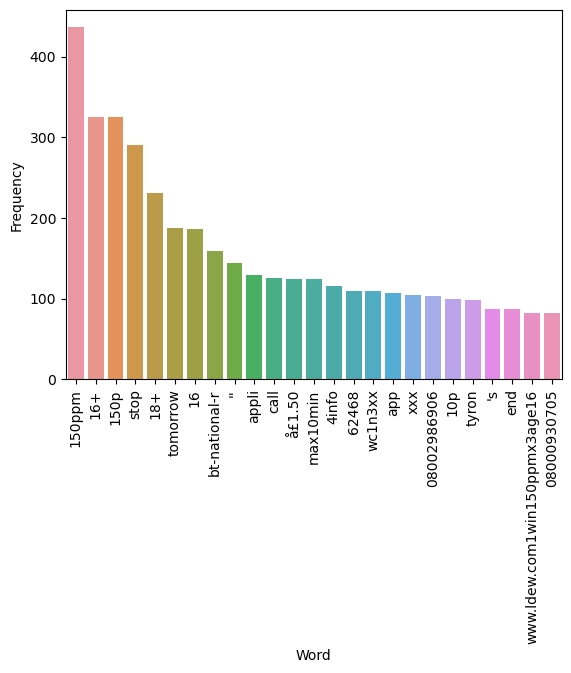

In [204]:
### plotting the bar plot

sns.barplot(data=email_spam_mcw_spam, x='Word', y='Frequency')
plt.xticks(rotation='vertical')
plt.show()

In [205]:
Counter(spam_freq)

Counter({'150ppm': 436,
         '16+': 325,
         '150p': 325,
         'stop': 291,
         '18+': 231,
         'tomorrow': 187,
         '16': 186,
         'bt-national-r': 159,
         "''": 144,
         'appli': 130,
         'call': 126,
         'å£1.50': 125,
         'max10min': 124,
         '4info': 116,
         '62468': 109,
         'wc1n3xx': 109,
         'app': 107,
         'xxx': 105,
         '08002986906': 104,
         '10p': 100,
         'tyron': 98,
         "'s": 87,
         'end': 87,
         'www.ldew.com1win150ppmx3age16': 82,
         '08000930705': 82,
         'cs': 81,
         '80062': 78,
         'www.100percent-real.com': 75,
         'vari': 75,
         'å£3/wk': 75,
         'info': 72,
         'row/w1j6hl': 72,
         '9ae': 72,
         'deliveri': 70,
         '...': 67,
         'x': 64,
         '18yr': 64,
         'servic': 62,
         '88088': 60,
         '08002986030': 58,
         'text': 58,
         'txt': 57,
         

In [206]:
pd.DataFrame(Counter(spam_freq).most_common(30))

,0,1
0,150ppm,436
1,16+,325
2,150p,325
3,stop,291
4,18+,231
5,tomorrow,187
6,16,186
7,bt-national-r,159
8,'',144
9,appli,130


### top 30 words used in ham 

In [207]:
email_spam[email_spam['target']==0]['transformed_text'].to_list()

['... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ...',
 '... ... ... ... ... ...',
 '... ... ... ... ... ... ... ... ... ... ...',
 'though though though though though though though though though though though though though',
 '',
 'callertun callertun callertun callertun callertun callertun callertun callertun callertun callertun callertun callertun callertun callertun callertun callertun callertun callertun callertun callertun callertun callertun callertun callertun',
 '',
 '',
 '',
 '',
 '',
 'b b b b b b b b b b b b b',
 '',
 'joke joke joke joke joke joke joke joke joke joke',
 '... ... ... ... ... ... ... ... ... ...',
 '',
 '',
 'lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol lol',
 '',
 '',
 'room room room room room room room room room room room room room room room',
 'lol lol lol lol lol lol lol lol lol lol lol lol',
 'us us us us us us us us us us us us us us us us us us us us us us us us u

### as these doesn't look like ham words

### top 25 words from ham corpus

In [208]:
ham_freq = []
for msg in email_spam[email_spam['target']==0]['transformed_text'].to_list():
    for word in msg.split():
        ham_freq.append(word)
        
        
        

In [209]:
### counting the frequency of each word in ham
word_freq = Counter(ham_freq)

In [210]:
### retrieving the most 25 common words with their frequencies
mcw = word_freq.most_common(25)

In [211]:
### creating a data frame for most common words list
email_spam_most_common = pd.DataFrame(mcw, columns=['Word','Frequency'])

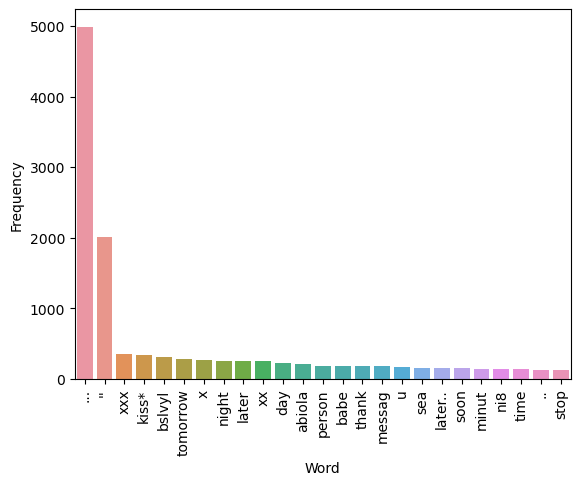

In [212]:
### plotting the bar plot

sns.barplot(data=email_spam_most_common, x='Word',y='Frequency')
plt.xticks(rotation='vertical')
plt.show()

In [213]:
Counter(ham_freq)

Counter({'...': 4990,
         "''": 2016,
         'xxx': 348,
         'kiss*': 332,
         'bslvyl': 306,
         'tomorrow': 278,
         'x': 270,
         'night': 259,
         'later': 252,
         'xx': 248,
         'day': 220,
         'abiola': 212,
         'person': 186,
         'babe': 178,
         'thank': 178,
         'messag': 176,
         'u': 165,
         'sea': 153,
         'later..': 152,
         'soon': 150,
         'minut': 139,
         'ni8': 134,
         'time': 133,
         '..': 129,
         'stop': 127,
         'tonight': 123,
         'dream': 123,
         'hour': 119,
         'callertun': 112,
         'love': 112,
         'fullonsms.com': 110,
         'free': 110,
         'worri': 109,
         'lol': 107,
         'dear': 107,
         'around': 104,
         'student': 102,
         'ok': 98,
         'morn': 98,
         'us': 97,
         'smoke': 97,
         'week': 96,
         'bit': 93,
         'mrng': 93,
         'dream

In [214]:
pd.DataFrame(Counter(ham_freq).most_common(30))

,0,1
0,...,4990
1,'',2016
2,xxx,348
3,kiss*,332
4,bslvyl,306
5,tomorrow,278
6,x,270
7,night,259
8,later,252
9,xx,248


In [215]:
Counter(ham_freq).most_common(30)

[('...', 4990),
 ("''", 2016),
 ('xxx', 348),
 ('kiss*', 332),
 ('bslvyl', 306),
 ('tomorrow', 278),
 ('x', 270),
 ('night', 259),
 ('later', 252),
 ('xx', 248),
 ('day', 220),
 ('abiola', 212),
 ('person', 186),
 ('babe', 178),
 ('thank', 178),
 ('messag', 176),
 ('u', 165),
 ('sea', 153),
 ('later..', 152),
 ('soon', 150),
 ('minut', 139),
 ('ni8', 134),
 ('time', 133),
 ('..', 129),
 ('stop', 127),
 ('tonight', 123),
 ('dream', 123),
 ('hour', 119),
 ('callertun', 112),
 ('love', 112)]

In [216]:
Counter(spam_freq).most_common(30)

[('150ppm', 436),
 ('16+', 325),
 ('150p', 325),
 ('stop', 291),
 ('18+', 231),
 ('tomorrow', 187),
 ('16', 186),
 ('bt-national-r', 159),
 ("''", 144),
 ('appli', 130),
 ('call', 126),
 ('å£1.50', 125),
 ('max10min', 124),
 ('4info', 116),
 ('62468', 109),
 ('wc1n3xx', 109),
 ('app', 107),
 ('xxx', 105),
 ('08002986906', 104),
 ('10p', 100),
 ('tyron', 98),
 ("'s", 87),
 ('end', 87),
 ('www.ldew.com1win150ppmx3age16', 82),
 ('08000930705', 82),
 ('cs', 81),
 ('80062', 78),
 ('www.100percent-real.com', 75),
 ('vari', 75),
 ('å£3/wk', 75)]

In [280]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [281]:
X = tfidf.fit_transform(email_spam['transformed_text']).toarray()
y = email_spam['target'].values

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

## building and training our model

In [283]:
from sklearn.feature_extraction.text import CountVectorizer


In [284]:
cv = CountVectorizer()

In [285]:
X = cv.fit_transform(email_spam['transformed_text']).toarray()

In [286]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [287]:
X.shape

(5572, 1133)

In [288]:
y = email_spam['target'].values

In [289]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [290]:
y.shape

(5572,)

In [291]:
### importing train,test,split

In [292]:
from sklearn.model_selection import train_test_split

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

### using Naive Bayes 

In [294]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [295]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [296]:
GauNB = GaussianNB()
MulNB = MultinomialNB()
BNB = BernoulliNB()

#### Gaussian Naive Bayes classfier

In [297]:
GauNB.fit(X_train,y_train)
y_pred1 = GauNB.predict(X_test)
print("accuracy score is:", accuracy_score(y_test,y_pred1))
print("confusion matrix is:", confusion_matrix(y_test,y_pred1))
print("precision score is:", precision_score(y_test,y_pred1))

accuracy score is: 0.2905829596412556
confusion matrix is: [[171 786]
 [  5 153]]
precision score is: 0.16293929712460065


#### Multinomial Naive Bayes classifier

In [298]:
MulNB.fit(X_train, y_train)
y_pred2 = MulNB.predict(X_test)
print("accuracy score is:", accuracy_score(y_test,y_pred2))
print("confusion matrix is:",confusion_matrix(y_test,y_pred2))
print("precision score is:", precision_score(y_test, y_pred2))

accuracy score is: 0.8511210762331839
confusion matrix is: [[849 108]
 [ 58 100]]
precision score is: 0.4807692307692308


#### Bernoulli Naive Bayes Classifier

In [299]:
BNB.fit(X_train,y_train)
y_pred3 = BNB.predict(X_test)
print("accuracy score is:", accuracy_score(y_test, y_pred3))
print("confusion matrix is:", confusion_matrix(y_test, y_pred3))
print("precision score is:", precision_score(y_test,y_pred3))

accuracy score is: 0.8923766816143498
confusion matrix is: [[955   2]
 [118  40]]
precision score is: 0.9523809523809523


##### bernoulli naive bayes gave us the precision score: 95%|

#### now importing and using various machine learning models to train and get actual score for our model

## using Logistic Regression

In [300]:
from sklearn.linear_model import LogisticRegression

In [301]:
logreg = LogisticRegression()

In [302]:
logreg.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [303]:
y_pred_logreg = logreg.predict(X_test)


In [304]:
print("the accuracy score is:", accuracy_score(y_test,y_pred_logreg))
print("the confusion matrix is:", confusion_matrix(y_test,y_pred_logreg))
print("the precision score is:", precision_score(y_test,y_pred_logreg))

the accuracy score is: 0.9165919282511211
the confusion matrix is: [[954   3]
 [ 90  68]]
the precision score is: 0.9577464788732394


## KNN

In [305]:
from sklearn.neighbors import KNeighborsClassifier

In [306]:
knn = KNeighborsClassifier()

In [307]:
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [308]:
y_pred_knn = knn.predict(X_test)


In [309]:
print("the accuracy score is:", accuracy_score(y_test,y_pred_knn))
print("the confusion matrix is:", confusion_matrix(y_test, y_pred_knn))
print("the precision score is:", precision_score(y_test,y_pred_knn))


the accuracy score is: 0.8941704035874439
the confusion matrix is: [[956   1]
 [117  41]]
the precision score is: 0.9761904761904762


## Decision Tree

In [310]:
from sklearn.tree import DecisionTreeClassifier

In [311]:
DT = DecisionTreeClassifier(max_depth=5)

In [312]:
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [313]:
y_pred_dt=DT.predict(X_test)

In [314]:
print("the accuracy score is:", accuracy_score(y_test,y_pred_dt))
print("the confusion matrix is:", confusion_matrix(y_test,y_pred_dt))
print("precision score is:", precision_score(y_test,y_pred_dt))

the accuracy score is: 0.874439461883408
the confusion matrix is: [[957   0]
 [140  18]]
precision score is: 1.0


## Random Forest

In [315]:
from sklearn.ensemble import RandomForestClassifier

In [316]:
RF = RandomForestClassifier(n_estimators=50) #max no of decision trees in random forest

In [317]:
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [318]:
y_pred_RF = RF.predict(X_test)

In [319]:
print("the accuracy score is:", accuracy_score(y_test,y_pred_RF))
print("the confusion matrix is:", confusion_matrix(y_test,y_pred_RF))
print("the precision score is:", precision_score(y_test,y_pred_RF))

the accuracy score is: 0.9165919282511211
the confusion matrix is: [[955   2]
 [ 91  67]]
the precision score is: 0.9710144927536232


## Support Vector Machine Classifier

In [320]:
from sklearn.svm import SVC

In [321]:
svc = SVC(kernel='sigmoid',gamma=0.1) ## less gamma value is cus it gives smooth decision boundary

In [322]:
svc.fit(X_train,y_train)

SVC(gamma=0.1, kernel='sigmoid')

In [323]:
y_pred_svc = svc. predict(X_test)

In [324]:
print("the accuracy score is:", accuracy_score(y_test,y_pred_svc))
print("the confusion matrix is:", confusion_matrix(y_test,y_pred_svc))
print("the precision score is:", precision_score(y_test,y_pred_svc))

the accuracy score is: 0.9040358744394619
the confusion matrix is: [[945  12]
 [ 95  63]]
the precision score is: 0.84


##### therefore we can conclude that random forest gave us best scores
##### accuracy = 91% precision = 97%